# 3.1) 국내 프로야구 연봉 예측

In [4]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### plt.plot()으로 그래프 그리기
1. pyplot()을 이용한 명령
2. 객체들의 생성(Figure, Line, Axes)
3. 그리기

# <Step1. 탐색> 프로야구 연봉 데이터 살펴보기

### 훑어보기

In [5]:
# Data Source : http://www.statiz.co.kr/

picher_file_path = '../data/picher_stats_2017.csv'
batter_file_path = '../data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path) # 투수 관련 DataFrame
batter = pd.read_csv(batter_file_path) # 타자 관련 DataFrame

In [6]:
picher.columns # col의 이름들 살펴보기

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [7]:
picher.head() # 데이터 눈으로 간단하게 살펴보기

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [8]:
print(picher.shape) # col과 row의 개수

(152, 22)


-----

### 한글 폰트 설정하기

In [9]:
# 현재 OS 내에 설치된 폰트를 확인
import matplotlib as mpl
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

{'Arial',
 'Bahnschrift',
 'Batang',
 'Calibri',
 'Cambria',
 'Candara',
 'Comic Sans MS',
 'Consolas',
 'Constantia',
 'Corbel',
 'Courier New',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'Ebrima',
 'Franklin Gothic Medium',
 'Gabriola',
 'Gadugi',
 'Georgia',
 'Gulim',
 'HCR Batang',
 'HCR Batang Ext',
 'HCR Batang ExtB',
 'HCR Dotum',
 'HCR Dotum Ext',
 'Haan Wing2',
 'Han Santteut Dotum',
 'Hancom Gothic',
 'Hancom Hoonminjeongeum_H',
 'Hancom Hoonminjeongeum_V',
 'Hancom MalangMalang',
 'HancomEQN',
 'HoloLens MDL2 Assets',
 'HyhwpEQ',
 'Impact',
 'Ink Free',
 'Javanese Text',
 'LG Smart UI',
 'Leelawadee UI',
 'Lucida Console',
 'Lucida Sans Unicode',
 'MS Gothic',
 'MV Boli',
 'Malgun Gothic',
 'Microsoft Himalaya',
 'Microsoft JhengHei',
 'Microsoft New Tai Lue',
 'Microsoft PhagsPa',
 'Microsoft Sans Serif',
 'Microsoft Tai Le',
 'Microsoft YaHei',
 'Microsoft Yi Baiti',
 'MingLiU-ExtB',
 'Mongolian Baiti',
 'Myanmar

In [10]:
mpl.rc('font', family='Malgun Gothic') # 맑은 고딕으로 폰트 설정

## 회귀분석 - 연봉

#### 연봉의 기초통계량 확인

In [11]:
picher['연봉(2018)'].describe

<bound method NDFrame.describe of 0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64>

#### 히스토그램 확인

<AxesSubplot: >

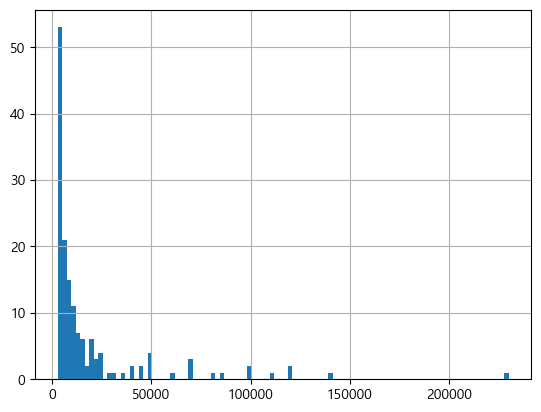

In [12]:
picher['연봉(2018)'].hist(bins=100) # 연봉 히스토그램 그리기
# bins는 막대의 너비를 조절하는 변수

<AxesSubplot: >

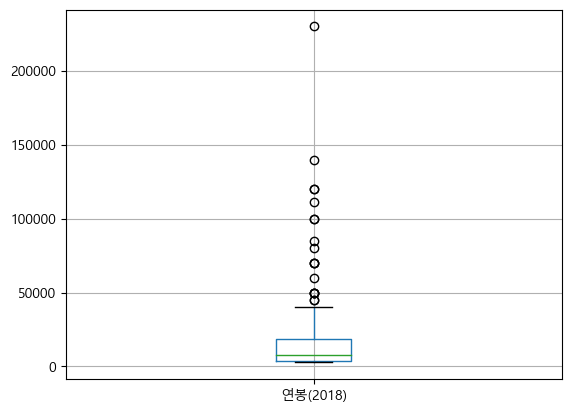

In [13]:
picher.boxplot(column=['연봉(2018)']) # 연봉의 Boxplot을 출력합니다.

5억원 미만의 연봉이 일반적인 것으로 보임!

-----

#### 회귀 분석에 사용할 피처 살펴보기
: 그래프로 표현할 수 없는 피처들은 제외하고, 수치형 변수들의 분포를 시각화

In [14]:
# 수치형 변수들만 갖고 오기
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)']]

### rcParams(Runtime Configuration Parameters)
딕셔너리 형태

설정에 자주 사용하는 값?

In [15]:
# 피처 각각에 대한 histogram을 출력합니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16] # 그림의 크기 설정
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5, 5, i+1) # 5번째 행, 5열의, i+1번째
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

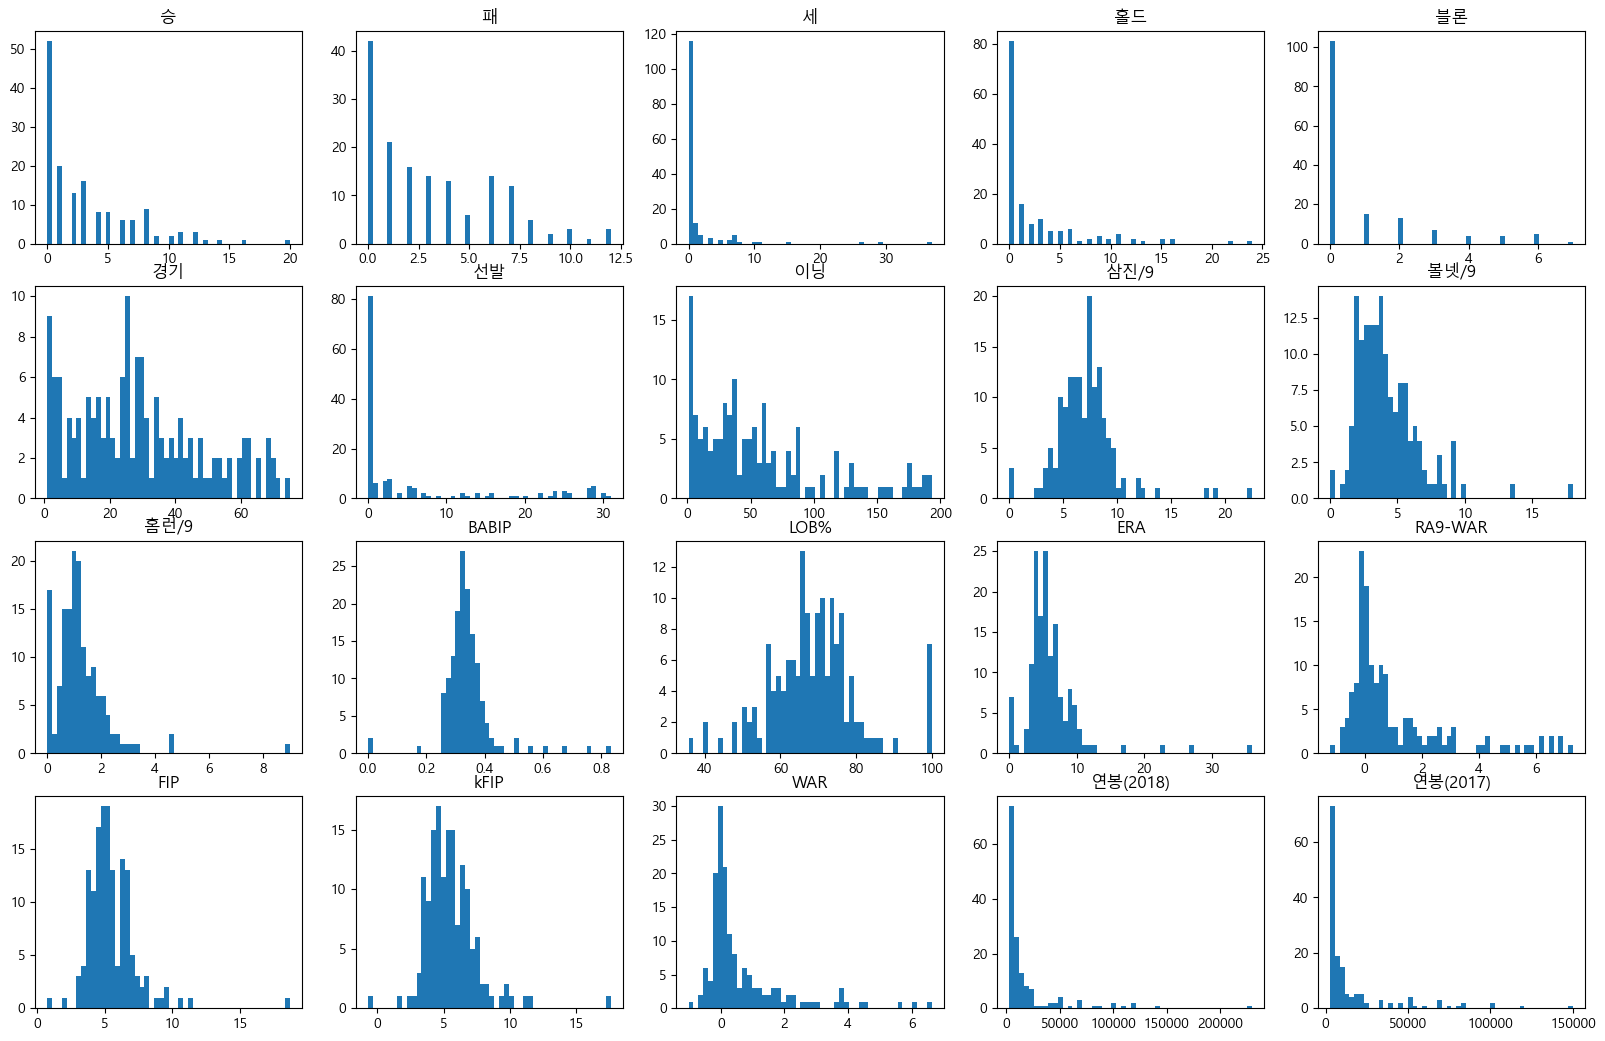

In [16]:
plot_hist_each_column(picher_features_df)

-----

# <Step2. 예측> : 투수의 연봉 예측하기

### 피처들의 단위 맞춰주기 : 피처 스케일링(표준화)

In [17]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [18]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의합니다.
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean() # 평균
        series_std = df[col].std() # 표준편차
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std) # scaling
    return df

In [19]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)

In [20]:
# 연봉(2018)이라는 열의 이름을 y로 변경
picher_df = picher_df.rename(columns={'연봉(2018)': 'y'}) 
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


-----

### 피처들의 단위 맞춰주기 : one-hot-encoding

In [21]:
# 범주형 피처들을 대상으로!

In [22]:
picher_df.drop('팀명',axis=1) # 기존 df에서 '팀명'에 해당하는 열(1) 지움
# picher_df.drop('팀명',axis='columns')로도 가능!

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,-0.309907,0.588357,-0.306452,-0.585705,0.680497,0.214300,-0.112010,0.104300,-0.968896,...,0.363854,0.162874,-1.002712,0.411349,-1.229537,0.375810,0.475992,-0.859111,7100,-0.335587
148,정용운,-0.051084,-0.369825,-0.306452,-0.585705,-0.543592,-0.198678,0.503369,0.042667,-0.777918,...,-0.147418,-0.871003,-0.269422,-0.030253,-0.361721,0.482702,0.622339,-0.874237,7500,-0.535215
149,노경은,-0.827554,-0.369825,-0.306452,-0.585705,-0.543592,-1.024633,-0.419699,-0.850019,-0.756699,...,1.219251,0.466294,-1.356417,1.347354,-1.023431,1.348527,1.389397,-0.964995,10000,-0.020173
150,김승현,-0.827554,-0.050431,-0.306452,-0.364245,-0.543592,0.627278,-0.624825,-0.273451,0.205264,...,0.226204,0.005545,0.463869,-0.066253,-0.790205,0.728554,0.713175,-1.033063,4000,-0.543201


In [23]:
# 팀명 피처를 one-hot encoding으로 변환합니다.
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1) # 기존에 범주형 변수는 버리고
picher_df = picher_df.join(team_encoding) # dummy variable로 수치화한 걸 다시 추가!

In [24]:
team_encoding.head(5) # dummy variable

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [25]:
picher_df.head()

,선수명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,연봉(2017),KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,켈리,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,0.672099,...,2.734705,0,0,0,0,1,0,0,0,0
1,소사,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,0.134531,...,1.337303,0,0,1,0,0,0,0,0,0
2,양현종,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,0.109775,...,5.329881,1,0,0,0,0,0,0,0,0
3,차우찬,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,0.350266,...,3.333592,0,0,1,0,0,0,0,0,0
4,레일리,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,0.155751,...,2.734705,0,0,0,0,0,0,1,0,0


-----

## 회귀 분석 적용하기

#### 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [26]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 독립변수
X = picher_df[picher_df.columns.difference(['선수명', 'y'])] # 선수명과 y값은 제외

# 종속변수
y = picher_df['y']

# 학습데이터 <-> 테스트데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [27]:
X

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
0,0.016783,-0.587056,-0.971030,0,0,0,0.446615,0,3.174630,1,...,0.672099,2.452068,-0.306452,3.313623,2.734705,2.645175,1.227145,0,-0.585705,-0.442382
1,-0.241686,-0.519855,-1.061888,0,0,1,-0.122764,0,3.114968,0,...,0.134531,2.349505,-0.098502,2.019505,1.337303,2.547755,2.504721,0,-0.585705,-0.668521
2,-0.095595,-0.625456,-0.837415,1,0,0,0.308584,0,2.973948,0,...,0.109775,2.554632,-0.306452,4.348918,5.329881,2.706808,0.907751,0,-0.585705,-0.412886
3,-0.477680,-0.627856,-0.698455,0,0,1,0.558765,0,2.740722,0,...,0.350266,2.246942,-0.306452,1.760682,3.333592,2.350927,1.227145,0,-0.585705,-0.186746
4,-0.196735,-0.539055,-0.612941,0,0,0,0.481122,0,2.751570,0,...,0.155751,2.452068,-0.306452,2.537153,2.734705,2.587518,1.227145,0,-0.585705,-0.294900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.162874,0.411349,0.375810,0,0,0,-1.002712,0,-1.229537,0,...,-0.968896,-0.112010,-0.306452,-0.309907,-0.335587,0.104300,0.588357,1,-0.585705,0.363854
148,-0.871003,-0.030253,0.482702,1,0,0,-0.269422,0,-0.361721,0,...,-0.777918,0.503369,-0.306452,-0.051084,-0.535215,0.042667,-0.369825,0,-0.585705,-0.147418
149,0.466294,1.347354,1.348527,0,0,0,-1.356417,0,-1.023431,0,...,-0.756699,-0.419699,-0.306452,-0.827554,-0.020173,-0.850019,-0.369825,0,-0.585705,1.219251
150,0.005545,-0.066253,0.728554,0,0,0,0.463869,0,-0.790205,0,...,0.205264,-0.624825,-0.306452,-0.827554,-0.543201,-0.273451,-0.050431,0,-0.364245,0.226204


In [28]:
y

0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: y, Length: 152, dtype: int64

In [29]:
X_train

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
94,0.544959,0.708951,-0.548806,1,0,0,-2.460666,0,-0.665457,0,...,-0.105959,-0.624825,-0.306452,-0.827554,-0.463349,-1.052812,-1.008613,0,-0.585705,-1.189625
118,-0.016931,-0.611056,0.386499,0,1,0,1.404205,0,-0.410536,0,...,-0.548038,-0.624825,-0.306452,-0.827554,-0.499282,-0.774469,-1.008613,0,-0.364245,0.776804
109,-0.185498,0.399349,1.022507,0,0,0,-0.079629,0,-0.584099,0,...,-0.311084,-0.317136,-0.306452,-0.568731,-0.547193,-0.909664,-0.689219,0,-0.585705,0.324526
5,-0.578820,-0.721456,-0.580874,0,1,0,0.653661,0,2.963100,0,...,0.130995,2.041816,-0.306452,1.243035,0.738417,2.048726,2.185327,0,-0.585705,-0.088425
75,-0.084357,0.245749,-0.067792,1,0,0,-1.002712,0,-0.594947,0,...,-0.219131,-0.624825,-0.306452,-0.568731,-0.459357,-0.853995,-0.689219,0,0.300137,-0.560368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.095447,-0.260654,-0.490016,0,0,0,0.179179,0,0.289141,0,...,-0.601087,-0.624825,-0.306452,0.984211,-0.259728,0.239495,0.268963,0,1.850362,-0.422718
19,-0.331589,-0.927857,-0.971030,0,0,0,1.844180,0,1.547475,0,...,0.689782,-0.624825,7.387680,-0.568731,2.135819,0.100324,-0.050431,0,-0.585705,-0.186746
98,-0.084357,0.168948,-0.062447,0,0,0,-0.683515,0,-0.638337,0,...,-0.204985,-0.317136,-0.306452,-0.568731,-0.551186,-0.496126,-0.689219,0,-0.585705,-0.363725
110,-0.016931,0.140148,0.541493,0,0,0,0.187806,0,-0.372569,1,...,-0.063520,-0.624825,1.357144,-0.309907,0.179456,-0.376836,0.907751,0,1.407441,0.668651


In [30]:
X_test

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
2,-0.095595,-0.625456,-0.837415,1,0,0,0.308584,0,2.973948,0,...,0.109775,2.554632,-0.306452,4.348918,5.329881,2.706808,0.907751,0,-0.585705,-0.412886
42,-0.264162,-0.507855,-0.671732,0,0,1,0.636407,0,0.213207,0,...,0.406852,-0.624825,-0.098502,-0.051084,-0.219802,-0.094516,-0.050431,0,4.729351,-0.176914
100,-0.972143,-0.455055,-0.110549,0,0,0,0.420734,0,-0.399688,0,...,-0.583404,-0.624825,-0.306452,-0.827554,-0.551186,-0.710848,-1.008613,1,-0.364245,0.039393
124,0.544959,-0.083053,0.514770,0,0,0,-0.278049,0,-0.849868,0,...,-0.477305,-0.419699,-0.306452,-0.568731,-0.419431,-0.535889,-1.008613,0,-0.585705,0.580161
27,-0.320351,-0.476655,-0.586218,0,0,0,0.248195,1,0.495248,0,...,0.594293,-0.317136,0.317397,0.466564,-0.020173,0.621223,-0.689219,0,0.743059,-0.186746
7,-0.533869,-0.697456,-0.666387,0,0,0,0.627780,0,3.375313,0,...,-0.286327,2.349505,-0.306452,2.795976,3.333592,2.448347,1.865933,0,-0.585705,-0.599696
8,-0.219211,-0.570256,-0.853448,0,0,0,0.394853,0,2.133251,0,...,0.728685,1.836690,-0.306452,1.501858,-0.379505,1.593436,1.546539,0,-0.142784,-0.678353
136,0.061734,0.708951,3.192415,0,0,0,1.171278,1,-0.660033,0,...,-0.901700,-0.522262,-0.306452,-0.827554,-0.499282,-0.973285,-0.689219,0,-0.585705,3.234841
142,-0.679960,-0.229454,0.423911,0,0,1,0.463869,0,-0.421383,0,...,-0.151935,-0.624825,0.317397,0.207740,-0.259728,-0.078611,-0.050431,0,1.185980,0.983279
37,-0.848527,-0.447855,-0.367090,0,0,0,0.860708,0,0.413890,0,...,1.860406,-0.624825,0.941245,0.207740,0.179456,0.360773,1.227145,0,2.957666,0.216372


### 회귀 분석 계수 학습 & 학습된 계수 출력

In [31]:
# 회구모델학습
lr = linear_model.LinearRegression() # 모델 오브젝트 선언
model = lr.fit(X_train, y_train) # 독립변수 및 종속변수 학습데이터

In [32]:
# 학습된 계수를 출력합니다.
print(lr.coef_) # 각각의 독립변수에 해당하는 계수들임

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.5564514    5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


In [33]:
picher_df.columns

Index(['선수명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', 'y',
       '연봉(2017)', 'KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '한화'],
      dtype='object')

-----

# <Step3. 평가> : 예측 모델 평가하기

### 가장 큰 영향을 주는 피처 선별하기

In [34]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행합니다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit() # Ordinary Least Sqaure
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           7.70e-42
Time:                        15:29:14   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.49e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [35]:
# 한글 출력을 위한 사전 설정 단계입니다.
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['figure.figsize'] = [20, 16] # 도형의 크기 설정

In [36]:
# 회귀 계수를 리스트로 반환합니다.
coefs = model.params.tolist() # parameter(b0, b1, b2, ...)
coefs_series = pd.Series(coefs)
coefs_series # 계수들에 해당하는 값들을 series로 만들기

0     16776.425668
1     -1481.017339
2      -416.687366
3    -94136.236492
4       303.185245
5      3436.052018
6      1116.997773
7     -1375.538303
8      1340.500421
9      3959.106537
10     2762.423686
11    10272.487465
12    77672.538045
13    -2434.389474
14      971.929284
15     2313.958468
16     7612.156618
17     1271.045001
18     -946.509155
19     5396.972799
20    -4797.302759
21     -250.697731
22      236.025301
23    19130.590214
24      854.026046
25     1301.619746
26     5477.887928
27     -935.072818
28    18144.600997
dtype: float64

In [37]:
# 변수명을 리스트로 반환합니다.
x_labels = model.params.index.tolist()
x_labels

['const',
 'BABIP',
 'ERA',
 'FIP',
 'KIA',
 'KT',
 'LG',
 'LOB%',
 'NC',
 'RA9-WAR',
 'SK',
 'WAR',
 'kFIP',
 '경기',
 '두산',
 '롯데',
 '볼넷/9',
 '블론',
 '삼성',
 '삼진/9',
 '선발',
 '세',
 '승',
 '연봉(2017)',
 '이닝',
 '패',
 '한화',
 '홀드',
 '홈런/9']

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

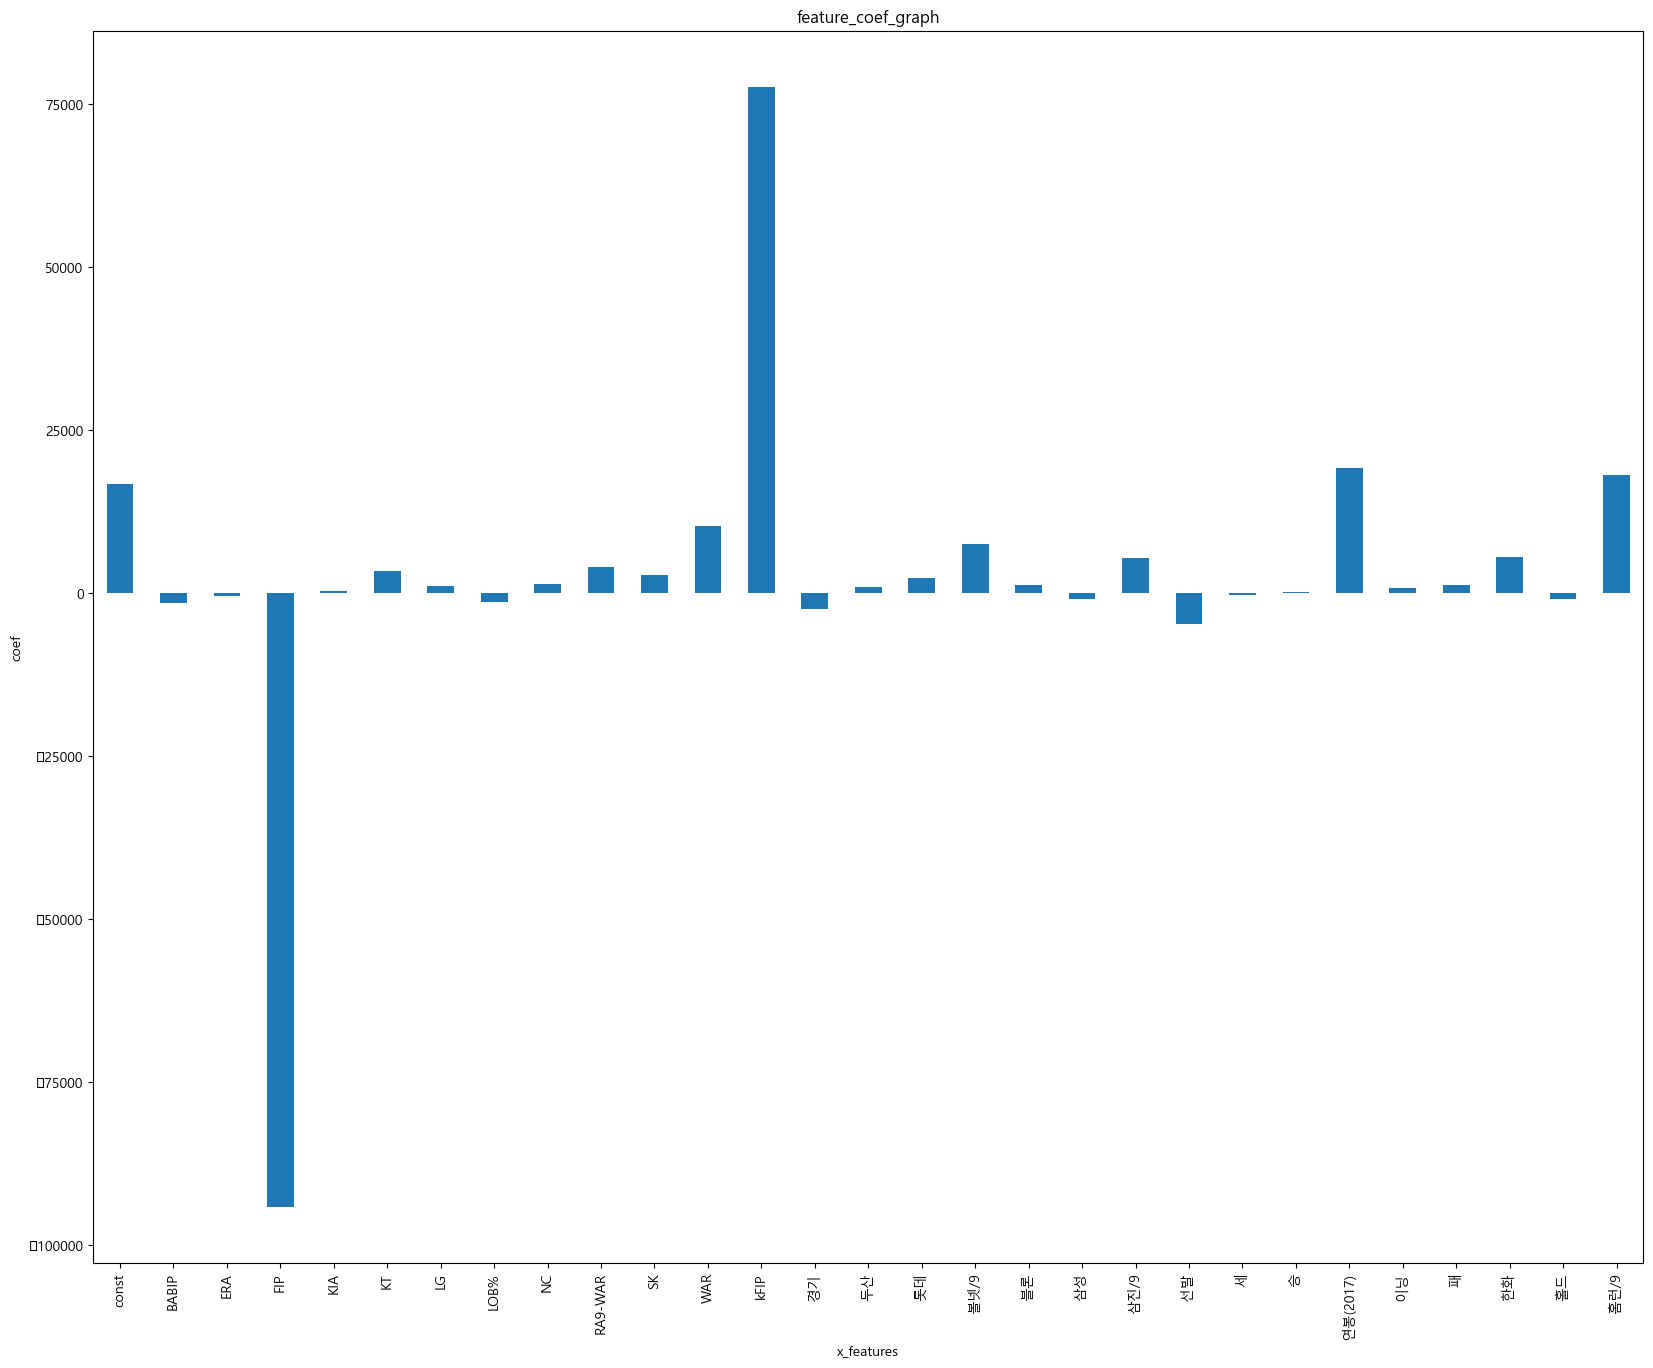

In [38]:
# 막대 그래프 그리기
ax = coefs_series.plot(kind='bar') 

ax.set_title('feature_coef_graph') # 전체 제목
ax.set_xlabel('x_features') # x축 제목
ax.set_ylabel('coef') # y축 제목
ax.set_xticklabels(x_labels) # 각각의 parameter에 이름 붙인 걸 적용

In [39]:
# FIP, WAR, 홈런, 작년 연봉 피처}가 가장 큰 영향력을 보여주고 있음

-----

### 예측 모델의 평가

### R2 score

In [40]:
# 학습 데이터 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=19)

# 모델 학습
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)

In [41]:
# 회귀 분석 모델을 평가합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9276949405576705
0.8860171644977817


둘 간의 차이가 벌어지지 않는 것이 좋음! (if, 학습점수 > 테스트 점수 : 과적합)

### RMSE score

In [42]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7282.718684746372
14310.696436889135


### `[미니 퀴즈 - 3.1]`
- `Train score, 그리고 Test score의 차이점은 무엇일까요? 그리고 어떤 점수가 더 높아야 할까요?` 
    - 훈련 데이터셋을 통해 계산한 점수와 테스트 데이터셋을 통해 계산한 점수간에는 어떤 차이가 있는 것인지 적어 봅시다. 그리고 이 두 점수의 차이가 크다면, 어떤 상황을 의미하는 것인지 생각해 봅시다.
        - traing data는 말 그대로 훈련하는 과정, 즉 모델을 구현하는 과정에서 사용되는 data이다. 반면에 test data는 결과적으로 확정된 모델이 정확한 모델인지 판단하기 위해 필요한 data를 말한다. 모델 입장에서는 이것이 '한 번도 보지 못한 data'이기 때문에 실제로 동작이 잘 될지 안 될지는 이를 준거로 해서 판단한다. 때문에 training score와 test score가 차이가 클수록 그 모델은 별로 좋지 않은 모델임을 암시한다.

### 피처들의 상관관계 분석

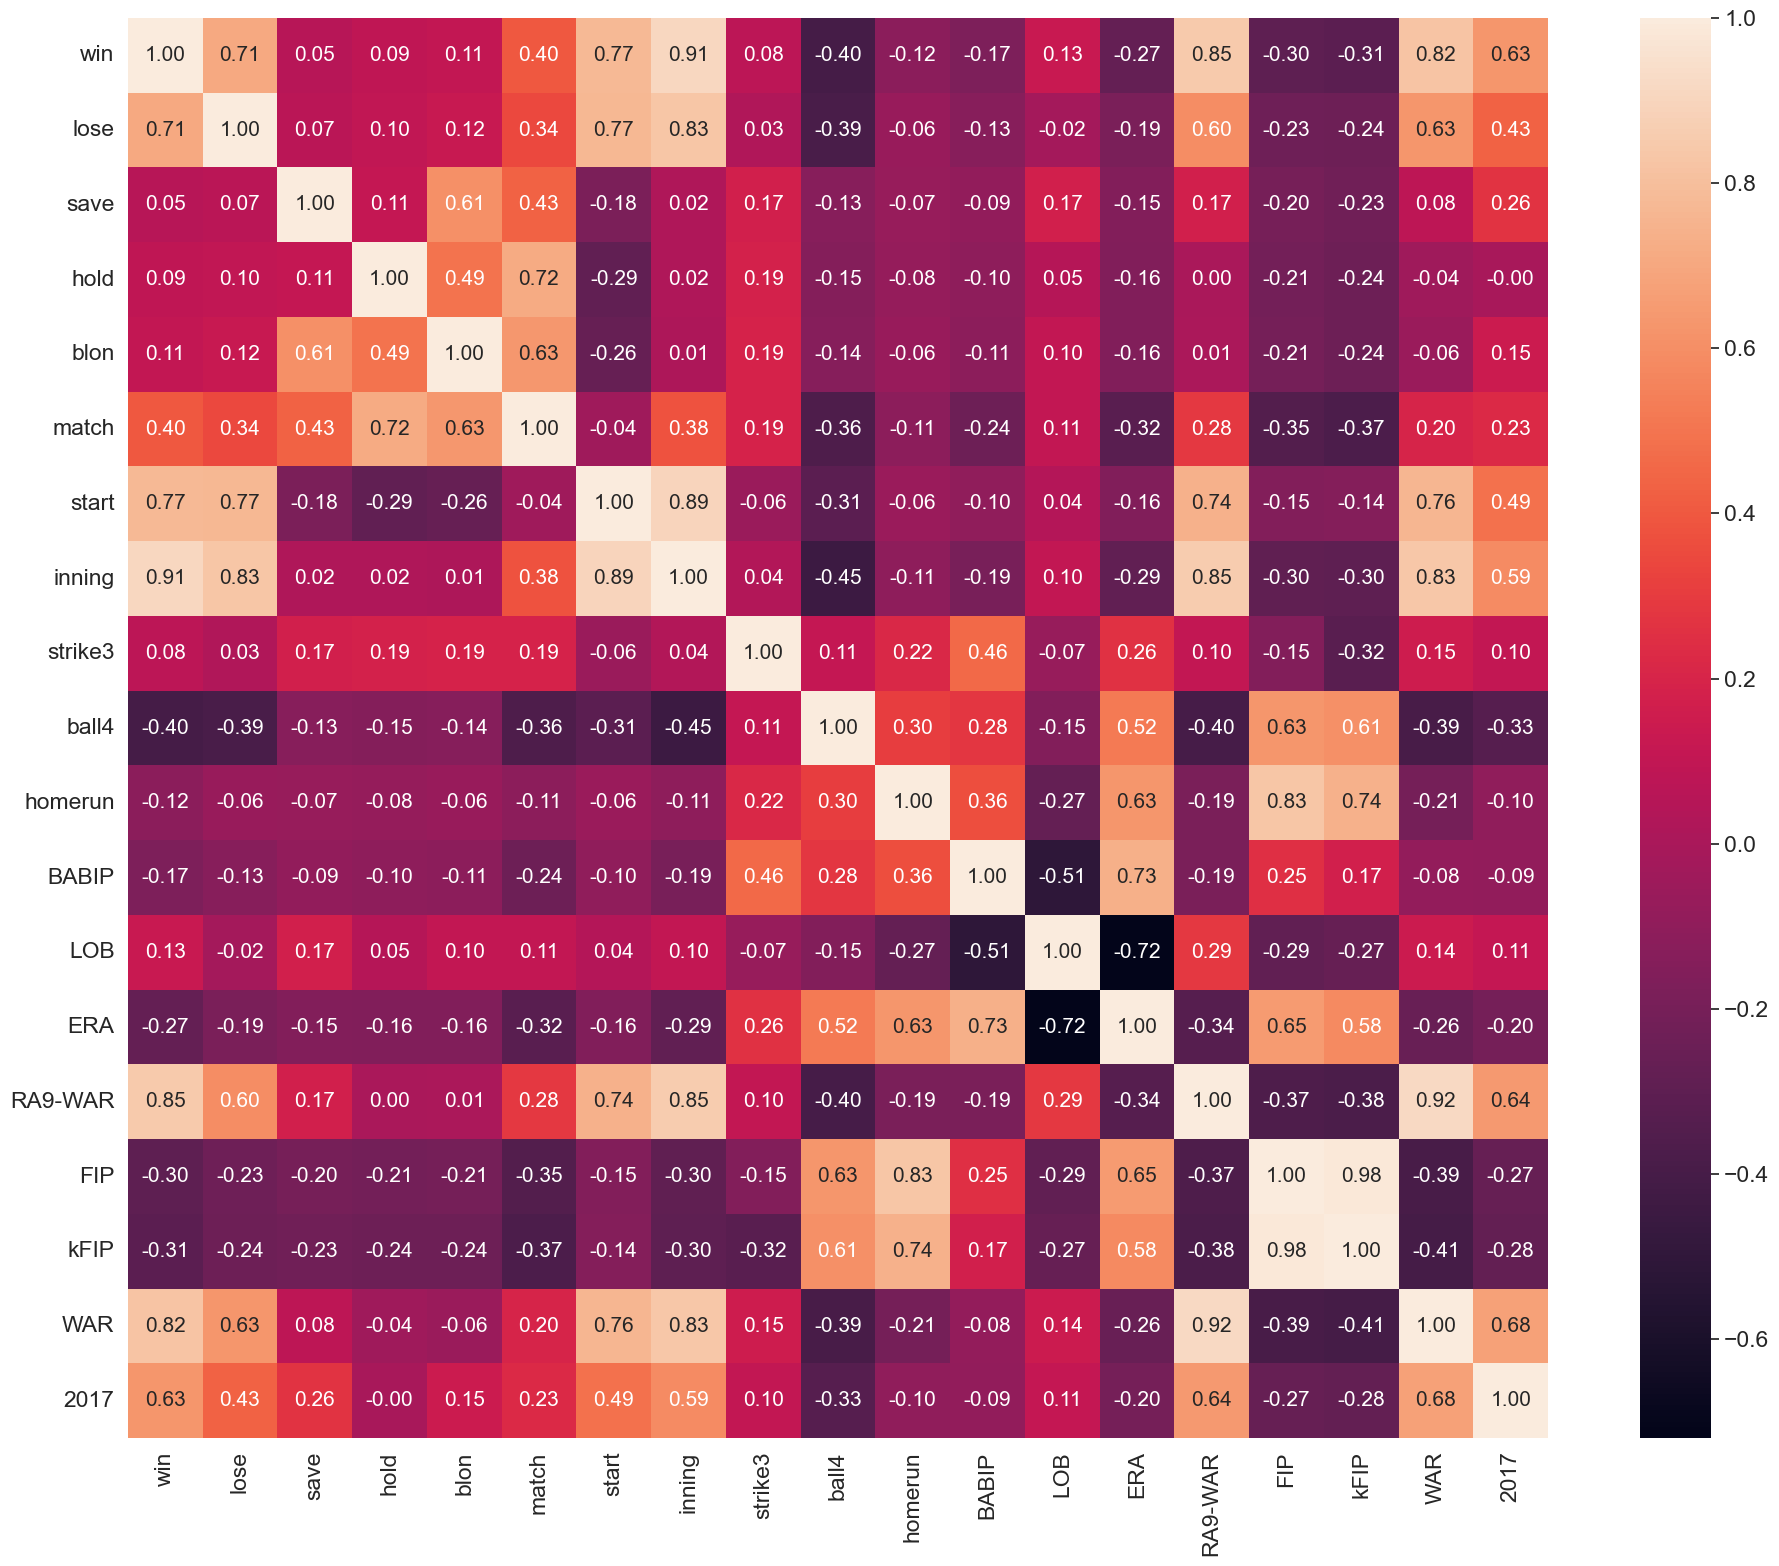

In [43]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산합니다.
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start', 
             'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB', 
             'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
# '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

-----

### 회귀분석 예측 성능을 높이기 위한 방법 : 다중공선성 확인

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
# vif 데이터프레임 선언
vif = pd.DataFrame()

#  column 입력
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1) ### 스터디할 때 질문해보기

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


-----

### `[미니 퀴즈 - 3.2]`
- `적절한 피처를 선정하여 다시 학습해 보세요.` 
    - 사용할 피처를 다시 고른 뒤, 다시 학습을 진행했을 때의 Train score, Test score가 어떻게 향상되는지 살펴봅니다.
        - 저자의 경우 아래의 과정을 거쳐 ['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)'] 피처를 선정했을 때, 더욱 좋은 결과를 나타냈습니다.
            - 선정 과정
                - 1. VIF 계수가 높은 피처들을 우선적으로 제거합니다. 단, (FIP, kFIP)와 같이 유사한 두가지 피처중에는 하나만을 제거합니다.
                - 2. 다시 공선성을 검증합니다. 이전 단계에서는 VIF 계수가 높았던 볼넷, 삼진 등의 피처의 VIF 계수가 낮아진 것을 확인할 수 있습니다. VIF 계수가 비정상적으로 높은 피처를 제거해주면, 다른 피처들의 공선성도 자연스레 감소하기 때문입니다.
                - 3. 여전히 VIF 계수가 높은 피처들을 제거합니다.
                - 4. 남은 피처를 토대로 다시한번 회귀분석을 실시합니다. 분석 결과에서 p-value가 유의하면서도 영향력이 큰 피처들을 선정합니다.
            - train_score, test_score를 비교했을 때, 기존보다 overfit이 비교적 덜 된것으로 보입니다
            - test rmse 역시 감소한 것을 볼 수 있습니다.

### 적절한 피처로 다시 학습하기

In [55]:
# 피처를 재선정합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)
# 4:1의 비율로 test_data 선정

In [56]:
# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [60]:
# Better Result!
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9150591192570362
0.9038759653889866


In [61]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.

y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7893.462873347693
13141.866063591076


In [62]:
# 피처마다의 VIF 계수를 출력합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1) # 소숫점 첫째자리까지

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


-----

# <Step4. 시각화> : 분석 결과의 시각화

### 예상 연봉과 실제 연봉 비교

In [63]:
# 2018년 연봉을 예측하여 데이터프레임의 column으로 생성합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)

In [64]:
# 원래의 데이터 프레임을 다시 로드합니다.
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합칩니다.
result_df = picher_df.sort_values(by=['y'], ascending=False) # y값 내림차순으로 정렬 

# inplace=True : 새로운 대상을 만들지 않고 원본 대상을 직접 수정
# inplace=False : 데이터를 수정하고 새로운 대상을 만들고 그 수정결과를 불러옴
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore') 

# on : 공통적인 col name 주고 각각의 data의 index를 표시
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


<AxesSubplot: xlabel='선수명'>

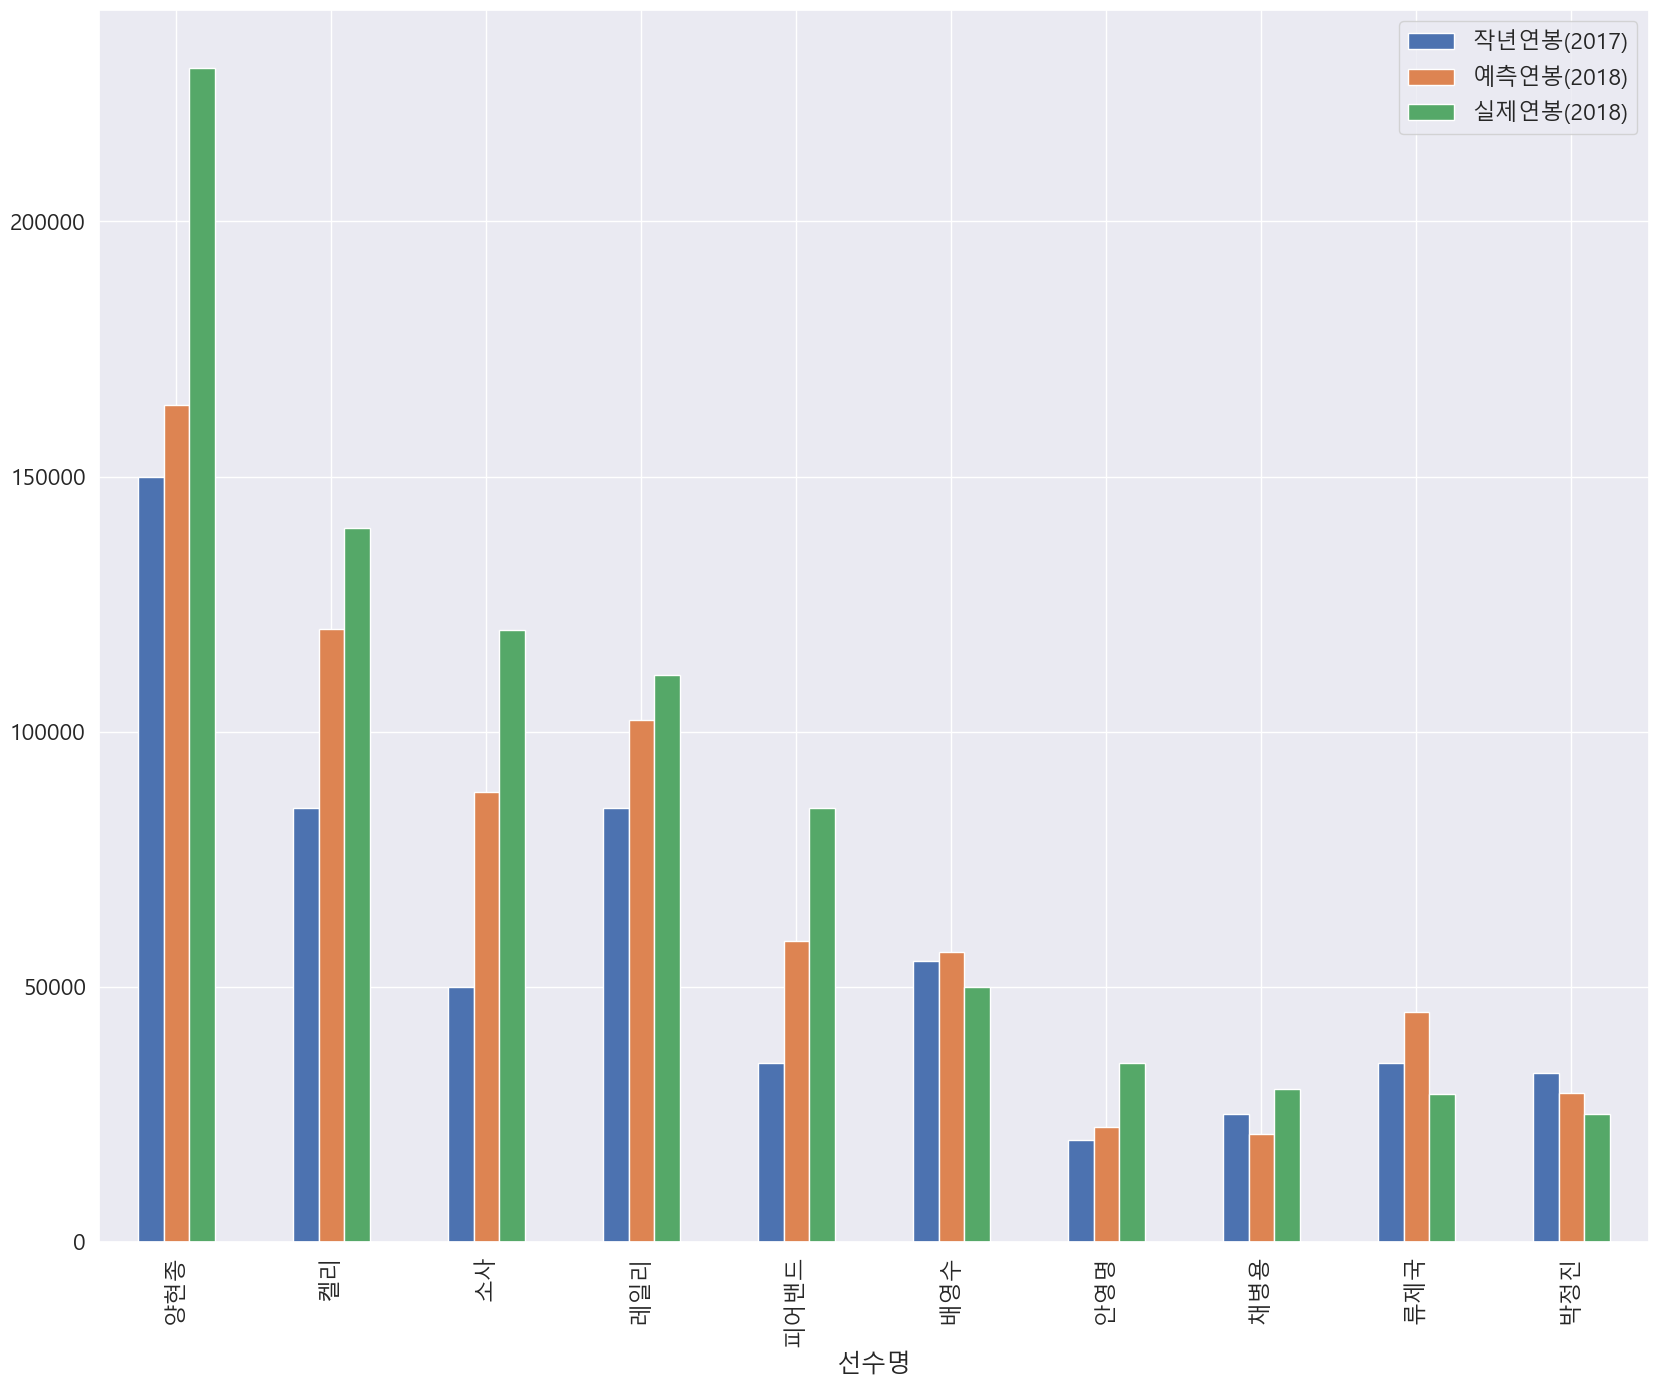

In [65]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력합니다.
mpl.rc('font', family='Malgun Gothic')
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind="bar")